Que - Prepare a classification model using Naive Bayes 
for salary data 

Data Set - Salary_data

In [1]:
#Import library

In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Import Data

In [4]:
train_data = pd.read_csv('SalaryData_Train.csv')
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
test_data = pd.read_csv('SalaryData_Test.csv')
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [6]:
train_test_data = pd.merge(test_data,train_data)
train_test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,43,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
1,43,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
2,37,Private,HS-grad,9,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,20,United-States,<=50K
3,25,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
4,25,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K


In [7]:
# Data Understanding

In [8]:
#For Train Data :

In [9]:
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
train_data.shape

(30161, 14)

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [13]:
train_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [14]:
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [15]:
train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [16]:
#For Test Data :

In [17]:
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [18]:
test_data.shape

(15060, 14)

In [19]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [20]:
test_data.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [21]:
test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [22]:
test_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [23]:
# Convert object to int :

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()
le

LabelEncoder()

In [26]:
col1 = train_data.columns[train_data.dtypes == "object"]
col1

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [30]:
for i in col1:
    train_data[i] = le.fit_transform(train_data[i])

In [28]:
train_data.dtypes

age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

In [31]:
col2 = test_data.columns[test_data.dtypes == "object"]
col2

Index(['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
       'race', 'sex', 'native', 'Salary'],
      dtype='object')

In [32]:
for i in col2:
    test_data[i] = le.fit_transform(test_data[i])

In [33]:
test_data.dtypes

age              int64
workclass        int64
education        int64
educationno      int64
maritalstatus    int64
occupation       int64
relationship     int64
race             int64
sex              int64
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int64
Salary           int64
dtype: object

In [34]:
#Perform Assumption Check:-

In [35]:
# For Train Data :

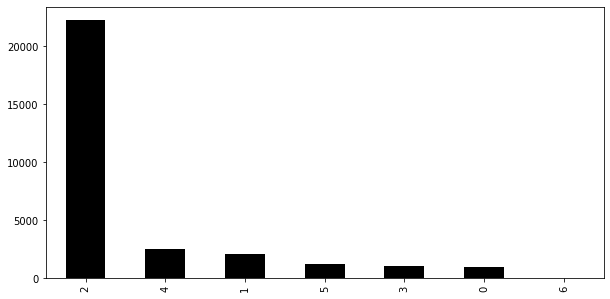

In [97]:
plt.figure(figsize = (10,5))
train_data.workclass.value_counts().plot.bar(color = 'black');

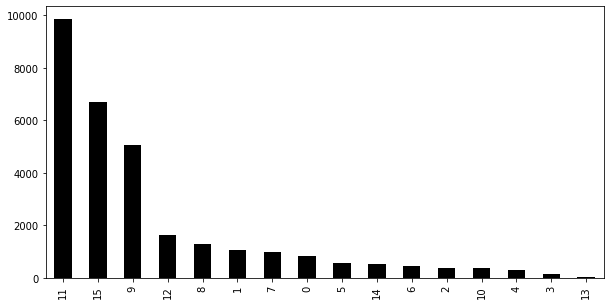

In [98]:
plt.figure(figsize = (10,5))
train_data.education.value_counts().plot.bar(color = 'black');

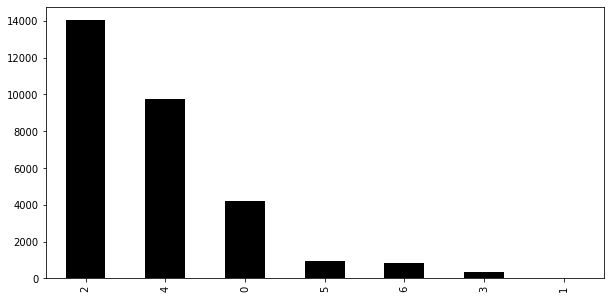

In [99]:
plt.figure(figsize = (10,5))
train_data.maritalstatus.value_counts().plot.bar(color = 'black');

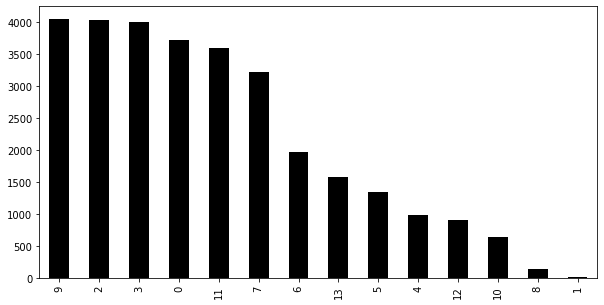

In [100]:
plt.figure(figsize = (10,5))
train_data.occupation.value_counts().plot.bar(color = 'black');

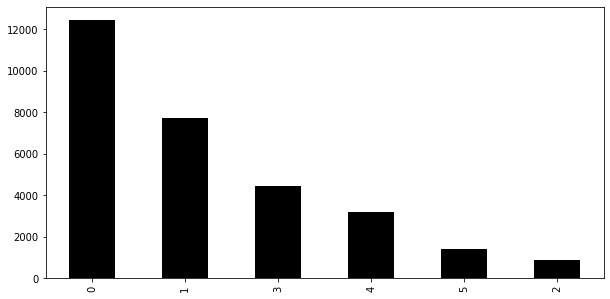

In [101]:
plt.figure(figsize = (10,5))
train_data.relationship.value_counts().plot.bar(color = 'black');

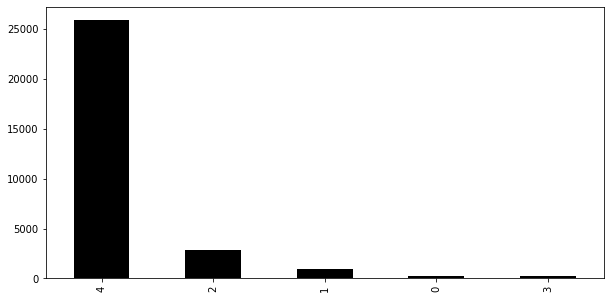

In [102]:
plt.figure(figsize = (10,5))
train_data.race.value_counts().plot.bar(color = 'black');

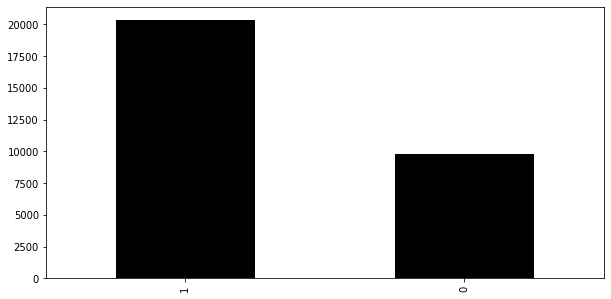

In [103]:
plt.figure(figsize = (10,5))
train_data.sex.value_counts().plot.bar(color = 'black');

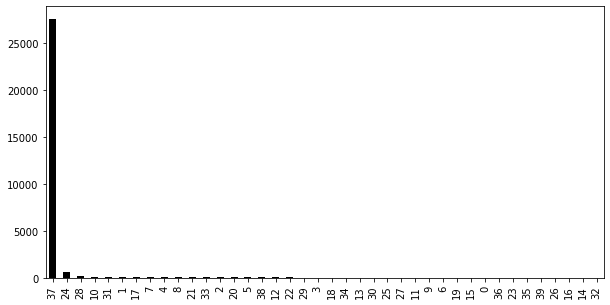

In [104]:
plt.figure(figsize = (10,5))
train_data.native.value_counts().plot.bar(color = 'black');

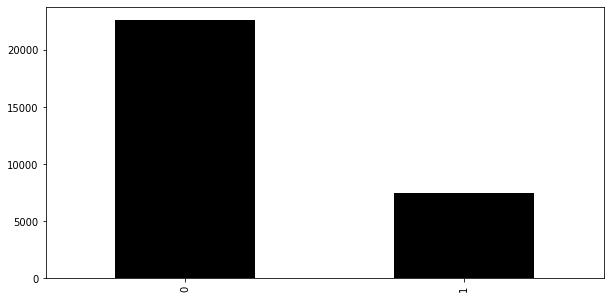

In [105]:
plt.figure(figsize = (10,5))
train_data.Salary.value_counts().plot.bar(color = 'black');

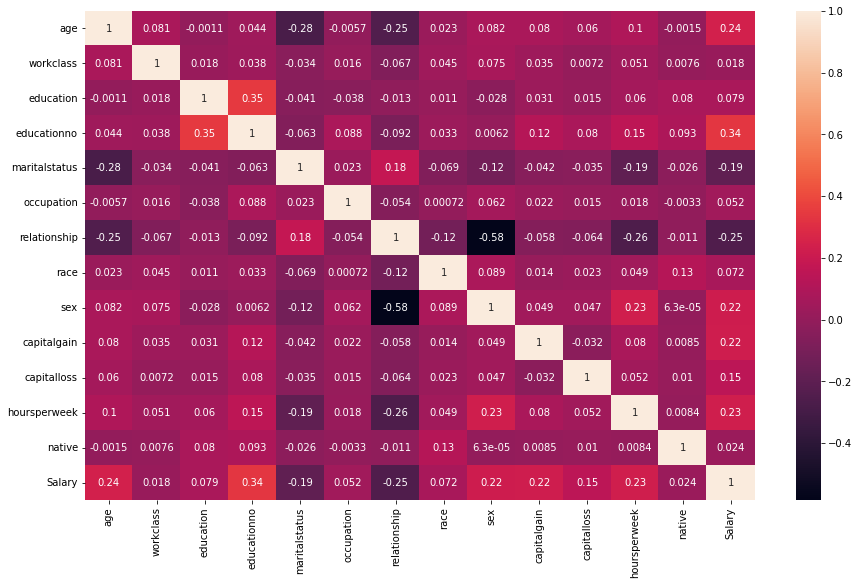

In [109]:
plt.figure(figsize = (15,9))
sns.heatmap(train_data.corr(),annot = True)
plt.show()

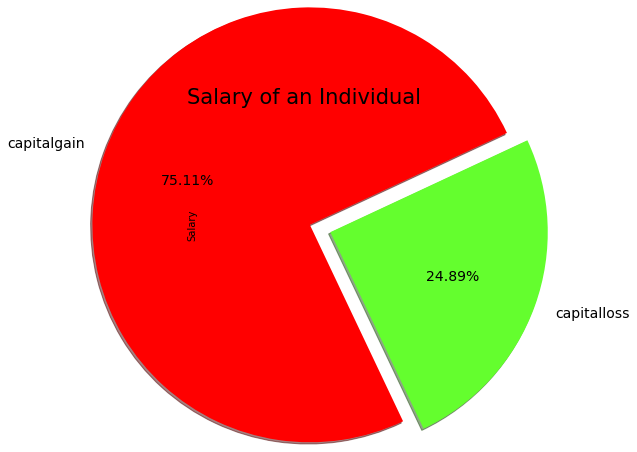

In [113]:
colors = ["#FF0000", "#64FE2E"]
labels ="capitalgain", "capitalloss"

plt.suptitle('Salary of an Individual', fontsize = 21)

train_data["Salary"].value_counts().plot.pie(explode = [0,0.25], autopct = '%1.2f%%',shadow = True, colors = colors,
                                             labels = labels, fontsize = 14, startangle = 25,radius = 2.5)
plt.show()

In [114]:
# For Test Data :

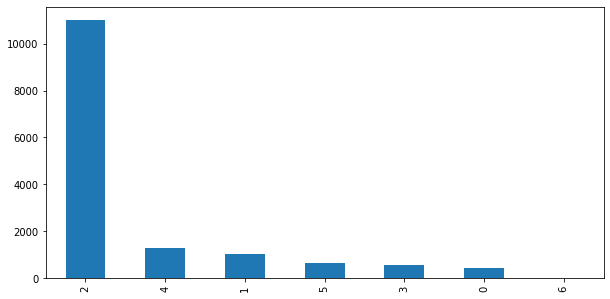

In [116]:
plt.figure(figsize = (10,5))
test_data.workclass.value_counts().plot.bar();

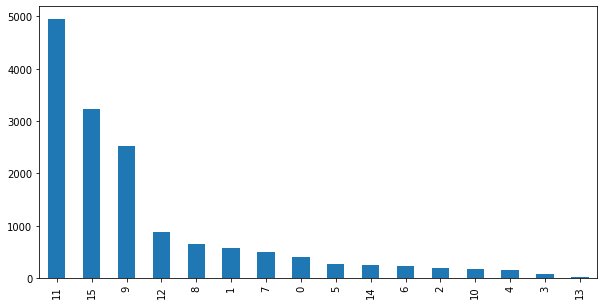

In [117]:
plt.figure(figsize = (10,5))
test_data.education.value_counts().plot.bar();

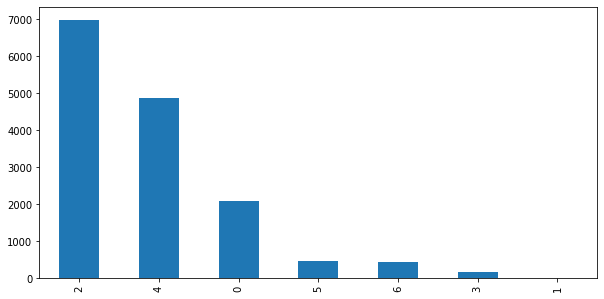

In [118]:
plt.figure(figsize = (10,5))
test_data.maritalstatus.value_counts().plot.bar();

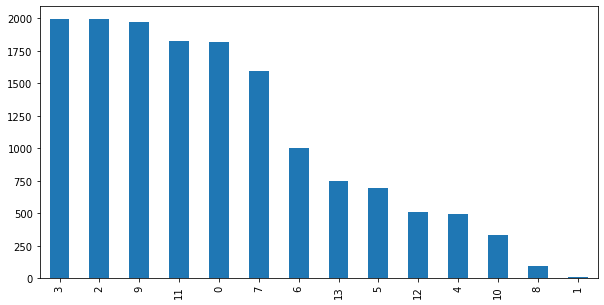

In [119]:
plt.figure(figsize = (10,5))
test_data.occupation.value_counts().plot.bar();

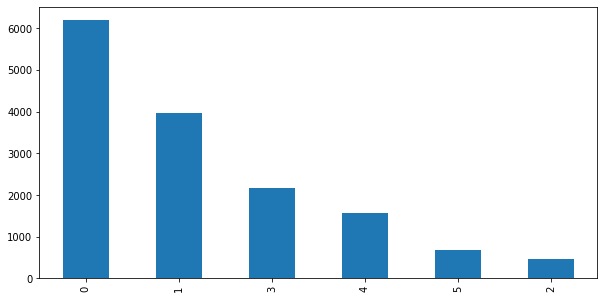

In [120]:
plt.figure(figsize = (10,5))
test_data.relationship.value_counts().plot.bar();

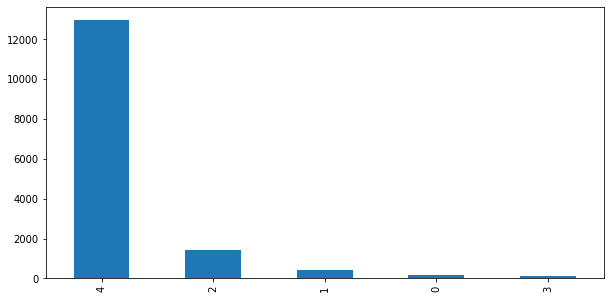

In [121]:
plt.figure(figsize = (10,5))
test_data.race.value_counts().plot.bar();

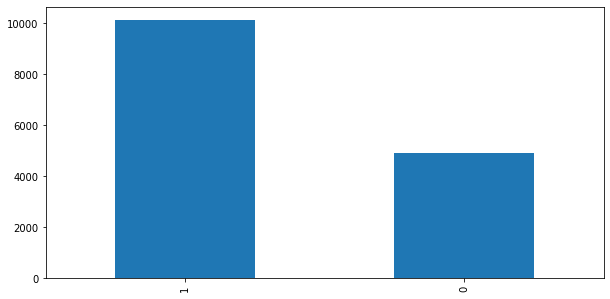

In [122]:
plt.figure(figsize = (10,5))
test_data.sex.value_counts().plot.bar();

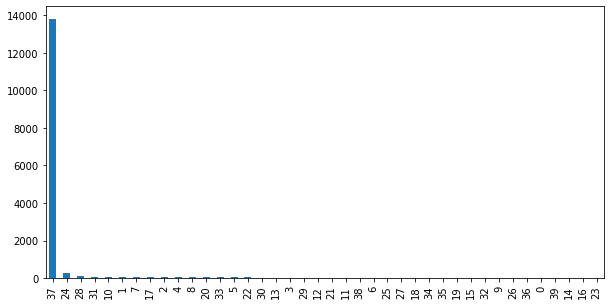

In [123]:
plt.figure(figsize = (10,5))
test_data.native.value_counts().plot.bar();

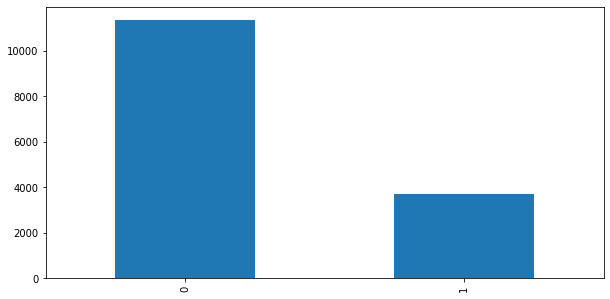

In [124]:
plt.figure(figsize = (10,5))
test_data.Salary.value_counts().plot.bar();

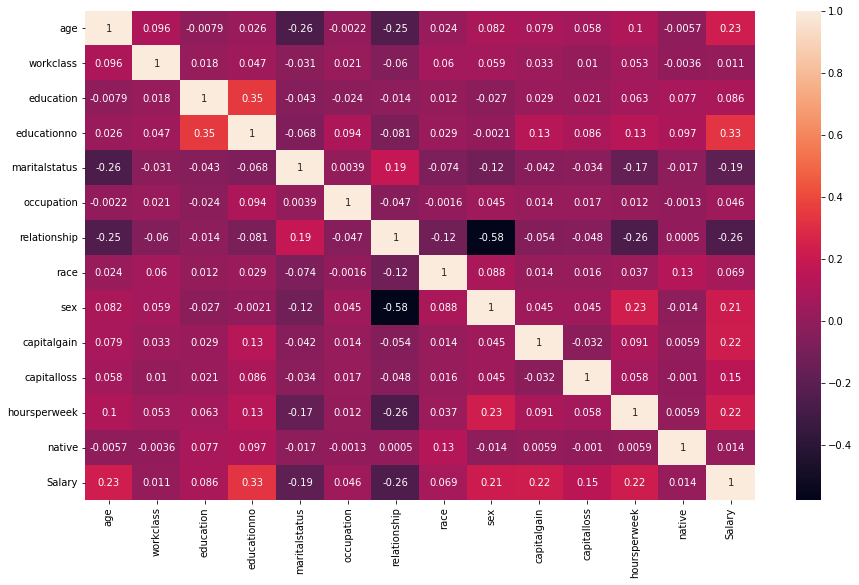

In [125]:
plt.figure(figsize = (15,9))
sns.heatmap(test_data.corr(),annot = True)
plt.show()

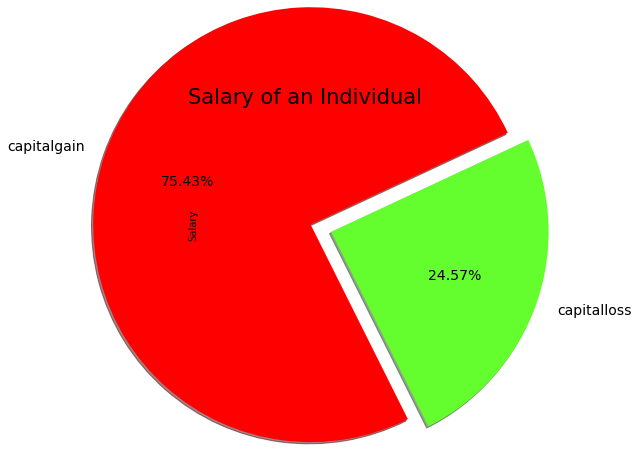

In [127]:
colors = ["#FF0000", "#64FE2E"]
labels ="capitalgain", "capitalloss"

plt.suptitle('Salary of an Individual', fontsize = 21)

test_data["Salary"].value_counts().plot.pie(explode = [0,0.25], autopct = '%1.2f%%',shadow = True, colors = colors,
                                             labels = labels, fontsize = 14, startangle = 25,radius = 2.5)
plt.show()

In [128]:
# Train Test split :

In [129]:
X_train = train_data.drop('Salary',axis = 1).values
y_train = train_data.Salary

In [130]:
X_test = test_data.drop('Salary',axis = 1).values
y_test = test_data.Salary

In [131]:
X_train.shape,X_test.shape

((30161, 13), (15060, 13))

In [132]:
y_test.shape,y_train.shape

((15060,), (30161,))

In [133]:
#Applying Gaussian Naive Bayes for Classification :

In [134]:
from sklearn.naive_bayes import GaussianNB

In [135]:
GNB_model = GaussianNB()
GNB_model

GaussianNB()

In [136]:
train_pred_gau = GNB_model.fit(X_train,y_train).predict(X_train)
train_pred_gau

array([0, 0, 0, ..., 0, 0, 1])

In [137]:
test_pred_gau = GNB_model.fit(X_train,y_train).predict(X_test)
test_pred_gau

array([0, 0, 0, ..., 0, 1, 0])

In [138]:
train_accuracy_gau = np.mean(train_pred_gau == y_train)
train_accuracy_gau
print('Training accuracy is:',train_accuracy_gau)

Training accuracy is: 0.7953317197705646


In [139]:
test_accuracy_gau = np.mean(test_pred_gau == y_test)
test_accuracy_gau
print('Testing accuracy is:',test_accuracy_gau)

Testing accuracy is: 0.7946879150066402


In [140]:
# Applying Multinomial Naive Bayes for Classification :

In [141]:
from sklearn.naive_bayes import MultinomialNB

In [142]:
MNB_model = MultinomialNB()
MNB_model

MultinomialNB()

In [143]:
train_pred_multi = MNB_model.fit(X_train,y_train).predict(X_train)
train_pred_multi

array([1, 0, 0, ..., 0, 0, 1])

In [144]:
test_pred_multi = MNB_model.fit(X_train,y_train).predict(X_test)
test_pred_multi

array([0, 0, 0, ..., 0, 1, 0])

In [145]:
train_accuracy_multi = np.mean(train_pred_multi == y_train)
train_accuracy_multi
print('Training accuracy is:',train_accuracy_multi)

Training accuracy is: 0.7729186698053778


In [146]:
test_accuracy_multi = np.mean(test_pred_multi == y_test)
test_accuracy_multi
print('Testing accuracy is:',test_accuracy_multi)

Testing accuracy is: 0.7749667994687915


Result :

a) For Gaussian    = Training accuracy : 0.7953317197705646
                     Testing accuracy  : 0.7946879150066402 

b) For Multinomial = Training accuracy : 0.7729186698053778   

                     Testing accuracy  : 0.7749667994687915

So we can see the model accuracy is best for Gaussian Naive Bayes algorithm.